In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow import keras
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
(x, y), (tx, ty) = load_data()

In [3]:
x, tx = x / 255., tx / 255.

In [4]:
x, tx = x.reshape(-1, 28 * 28), tx.reshape(-1, 28 * 28)
x = tf.constant(x, tf.float32)
tx = tf.constant(tx, tf.float32)

In [5]:
def relu(x):
    return tf.math.maximum(x, 0)

relu(tf.constant([[1, 2, -1], [-1, -1, 1]]))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 0],
       [0, 0, 1]], dtype=int32)>

loss: 2.302647, test acc: 0.113500
loss: 1.089387, test acc: 0.671200
loss: 0.283066, test acc: 0.918800
loss: 0.236685, test acc: 0.936200
loss: 0.184991, test acc: 0.945000
loss: 0.120859, test acc: 0.958900
loss: 0.119480, test acc: 0.960100
loss: 0.094833, test acc: 0.965800
loss: 0.086320, test acc: 0.967500
terminaled acc: 0.9715


Text(0.5, 1.0, 'acc')

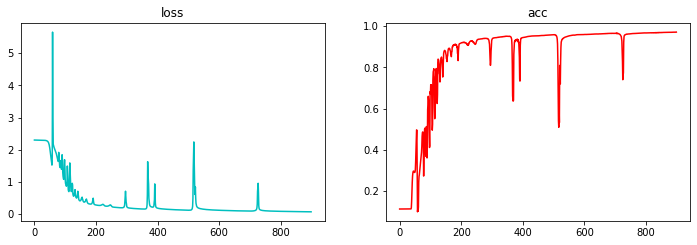

In [6]:
# 搞个三层网络
n_inputs = 784
n_hidden_1 = 256
n_hidden_2 = 64
n_outputs = 10

# 初始化每一层的参数矩阵
w_1 = tf.Variable(tf.random.normal((n_inputs, n_hidden_1), mean=0, stddev=.01))
b_1 = tf.Variable(tf.zeros(n_hidden_1))
w_2 = tf.Variable(tf.random.normal((n_hidden_1, n_hidden_2), mean=0, stddev=.01))
b_2 = tf.Variable(tf.zeros(n_hidden_2))
w_3 = tf.Variable(tf.random.normal((n_hidden_2, n_outputs), mean=0, stddev=.01))
b_3 = tf.Variable(tf.zeros(n_outputs))
params = [w_1, b_1, w_2, b_2, w_3, b_3]

#定义网络
# 第一层 输入特征784，输出特征256 （输入层）增加relu激活函数
# 第二层 输入特征256，输出特征64 （隐藏层）增加relu激活函数
# 第三层 输入特征64，输出特征10 （输出层）损失函数：交叉熵，优化器：SGD
def net(x):
    tf.reshape(x, (-1, n_inputs))
    y = tf.matmul(x, w_1) + b_1
    y = relu(y)
    y = tf.matmul(y, w_2) + b_2
    y = relu(y)
    return tf.matmul(y, w_3) + b_3

#定义损失函数
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(y, y_hat, from_logits=True)

# 开始训练
eta = 1e-5
optimizer = keras.optimizers.SGD(learning_rate=eta)
losses = []
acces = []
for i in range(900):
    with tf.GradientTape() as g:
        y_hat = net(x)
        l = loss(y_hat, y)
    grads = g.gradient(l, params)
    optimizer.apply_gradients(zip(grads, params))
    ty_hat = net(tx)
    test = tf.cast(tf.argmax(ty_hat, 1) == ty, tf.uint8)
    acc = test.numpy().sum() / len(ty)
    if i % 100 == 0:
        print('loss: %.6f, test acc: %.6f' % (tf.reduce_mean(l), acc))
    losses.append(tf.reduce_mean(l))
    acces.append(acc)
print('terminaled acc: {}'.format(acces[-1]))
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(losses, "c")
plt.title("loss")
plt.subplot(2, 2, 2)
plt.plot(acces, "r")
plt.title("acc")